# Analysis of filter circuit

This notebook analyses the filter in the circuit diagram below:

![Circuit Diagram of filter](assets/images/circuit.png)

Before we run our transfer function let us verify that our code works by testing an RC low-pass filter:

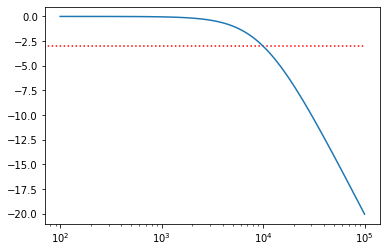

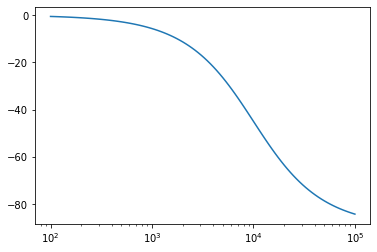

In [18]:
import scipy.signal as signal
import matplotlib.pyplot as plt

R = 5000
C = 20 * 10**(-9)
L = 50 * 10**(-3)

numerator = [1]
denominator = [R*C, 1]

LTIsystem = signal.TransferFunction(numerator,denominator)

w, mag, phase = signal.bode(LTIsystem)

plt.figure()
plt.semilogx(w,mag)
plt.figure()
plt.semilogx(w, phase)
plt.show()

Now onto our filter. See handwritten notes for complete derivation but the transfer function $H(s)$ is:

$$H(s) = \frac{u_{in}}{u_{out}} =  \frac{CLR \cdot s^2 + R}{CLR \cdot s^2 + Ls + R}$$

The minimum magnitude is:-22.691625447116405


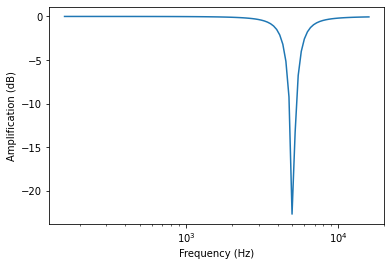

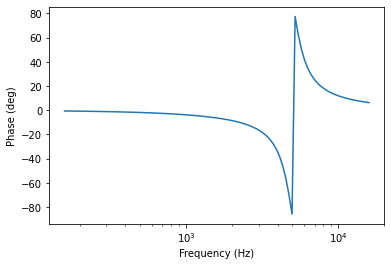

In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

R = 5000
C = 20 * 10**(-9)
L = 50 * 10**(-3)

numerator = [C*L*R, 0, R]
denominator = [C*L*R, L, R]

LTIsystem = signal.TransferFunction(numerator,denominator)

w, mag, phase = signal.bode(LTIsystem)

print('The minimum magnitude is:' + str(min(mag)))

# Convert rad/s to Hz
f=w/(2*np.pi)

plt.figure()
plt.semilogx(f,mag)
#plt.hlines(-3,min(f),max(f),linestyles="dotted",colors='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplification (dB)')
plt.figure()
plt.semilogx(f, phase)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (deg)')
plt.show()

